# 79_PCA - wine data

### `PCA` 는
- 새로운 축을 만들어 낸다.
- 새로운 특성을 만들어 낸다.
- 주성분을 찾아내고 나면, 데이터를 주성분의 설명력이라는 변수에 의해 얼마나 데이터를 설명하는지 묘사할 수 있다.

In [24]:
import pandas as pd

In [25]:
# 데이터 불러오기
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, sep=',', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [26]:
wine_y = wine['color']      # target 데이터는 빼놓기.
wine_X = wine.drop(['color'], axis=1)
                    # labels : single label or list-like // color 컬럼을 없애야 한다.
                                # axis : {0 or 'index', 1 or 'columns'}, default 0 // 컬럼을 없애야 하기 때문에 1 또는 columns 를 입력
wine_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# StandardScaler 적용
from sklearn.preprocessing import StandardScaler

wine_ss = StandardScaler().fit_transform(wine_X)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

In [28]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components = 2):
                # StandardScale 된 데이터
                            # 주성분 개수!
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

In [29]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
                                        # 12개의 컬럼에서 2개를 추출
pca_wine.shape

(6497, 2)

In [30]:
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

# 두 component의 합이 50%가 안된다.

[0.25346226 0.22082117]
0.4742834274323624


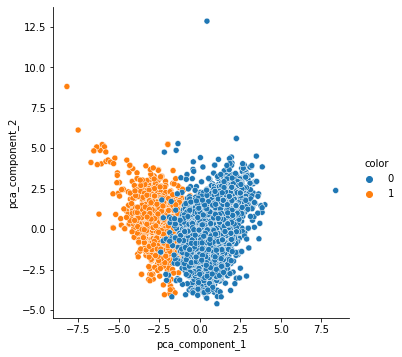

In [31]:
# 그래프로 그려보기
import seaborn as sns

pca_columns = ['pca_component_1', 'pca_component_2']
pca_wine_pd = pd.DataFrame(pca_wine, columns = pca_columns)
pca_wine_pd['color'] = wine_y.values

sns.pairplot(pca_wine_pd, hue='color', height=5,\
            x_vars=['pca_component_1'], y_vars = ['pca_component_2']);

In [32]:
# 랜덤포레스트 score 함수

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators= 100)     # A random forest is a meta estimator
                                # random_stats : 무작위 선정의 케이스를 고정, 가장 좋은(?) 결과물을 나타내기 위해 조정하는 것.
                                                    # n_estimators = : 나무의 갯수 , 기본은 100개
    
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)    # -> scores를 반환
                                # estimator : estimator object implementing 'fit' // 훈련 모델
                                    # X : data to fit // 훈련용 데이터
                                        # y : the target variable to try to predict // 타겟
                                            # scoring : A str (see model evaluation documentation) or a scorer callable object
                                                                # cv : Determines the cross-validation splitting strategy

    # print(scores_rf)        # cv 개수에 맞는 결과값을 리스트 형식으로 나타냄.
    print('Score :', np.mean(scores_rf))        # scores_rf 의 결과값 5개의 평균(np.mean)을 출력함.
    

In [33]:
rf_scores(wine_ss, wine_y)      # 원 데이터

Score : 0.9935352638124


In [34]:
pca_X = pca_wine_pd[['pca_component_1','pca_component_2']]  # PCA 데이터
rf_scores(pca_X, wine_y)

Score : 0.981067803635933


In [36]:
def get_pd_from_pca(pca_data, cols=['PC1', 'PC2']):
    return pd.DataFrame(pca_data, columns=cols)

In [37]:
# 주성분 3개로 표현
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

cols = ['pca_1','pca_2','pca_3']
pca_wine_pd = get_pd_from_pca(pca_wine, cols=cols)

pca_X = pca_wine_pd[cols]
rf_scores(pca_X, wine_y)

[0.25346226 0.22082117 0.13679223]
0.6110756621838709
Score : 0.9832236631728548


In [38]:
# 주 성분 3개로 표현한 것을 정리
pca_wine_plot = pca_X
pca_wine_plot['color'] = wine_y.values
pca_wine_plot.head()

,pca_1,pca_2,pca_3,color
0,-3.348438,0.568926,-2.727386,1
1,-3.228595,1.197335,-1.998904,1
2,-3.237468,0.952580,-1.746578,1
3,-1.672561,1.600583,2.856552,1
4,-3.348438,0.568926,-2.727386,1


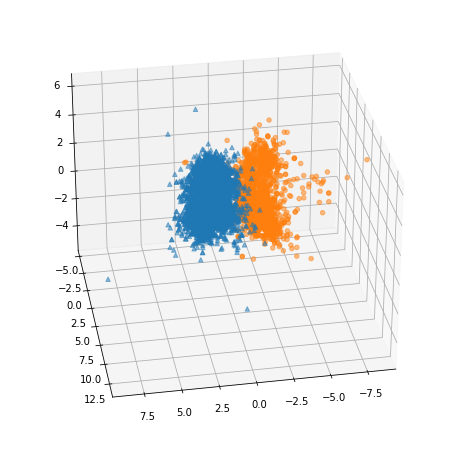

In [39]:
# 3D로 그리기
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

markers=['^','o']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i, marker in enumerate(markers):
    x_axis_data = pca_wine_plot[pca_wine_plot['color'] == i]['pca_1']
    y_axis_data = pca_wine_plot[pca_wine_plot['color'] == i]['pca_2']
    z_axis_data = pca_wine_plot[pca_wine_plot['color'] == i]['pca_3']

    ax.scatter(x_axis_data, y_axis_data, z_axis_data,\
                s = 20, alpha=0.5, marker=marker)

ax.view_init(30,80)
plt.show()    

In [40]:
# plotly로 그리기
import plotly.express as px

fig = px.scatter_3d(pca_wine_plot,
                    x='pca_1', y='pca_2', z='pca_3',
                    color='color', symbol='color',
                    opacity = 0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()